# Graficación de provincias según los viajes realizados unicamente de manera interprovincial

# Carga de datos

In [ ]:
!pip install geopandas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/geolocalizaciones.geojson
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/df_AndaluciaLocalizado.csv
!wget https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/df_CLMLocalizado.csv

--2021-12-18 23:53:50--  https://github.com/JoseAlbertoSeco/MineriaDatos/raw/main/data/processed/geolocalizaciones.geojson
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/JoseAlbertoSeco/MineriaDatos/main/data/processed/geolocalizaciones.geojson [following]
--2021-12-18 23:53:50--  https://raw.githubusercontent.com/JoseAlbertoSeco/MineriaDatos/main/data/processed/geolocalizaciones.geojson
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7605179 (7.3M) [text/plain]
Saving to: ‘geolocalizaciones.geojson.1’

geolocalizaciones.g 100%[===================>]   7.25M  --.-KB/s    in 0.09s   

2021-12

In [ ]:
map_data = gpd.read_file('geolocalizaciones.geojson')
map_data.head()

,id,NAME_1,NAME_2,geometry
0,0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."


In [ ]:
df_CLMLocalizado = pd.read_csv('df_CLMLocalizado.csv')
df_CLMLocalizado.head(2)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
0,700811,2018-01-09,es,Cuenca,Valdepeñas,2.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Ciudad Real,No
1,735723,2017-01-11,es,Cuenca,Tomelloso,3.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Ciudad Real,No


In [ ]:
df_AnaluciaLocalizado = pd.read_csv('df_AndaluciaLocalizado.csv')
df_AnaluciaLocalizado.head(2)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
0,293188,2019-08-28,es,Cádiz,Granada,12.0,9,5,4,5,0,Andalucía,Andalucía,Cádiz,Granada,No
1,375743,2019-08-28,es,Cádiz,Sevilla,132.0,36,46,19,40,4,Andalucía,Andalucía,Cádiz,Sevilla,No


## Viajes en Castilla-La Mancha

In [ ]:
cml = map_data[map_data["NAME_1"] == 'Castilla-La Mancha']
cml

,id,NAME_1,NAME_2,geometry
12,12,Castilla-La Mancha,Albacete,"MULTIPOLYGON (((-2.76198 38.53278, -2.76382 38..."
13,13,Castilla-La Mancha,Ciudad Real,"MULTIPOLYGON (((-4.94063 39.39513, -4.94171 39..."
14,14,Castilla-La Mancha,Cuenca,"MULTIPOLYGON (((-2.66225 39.32198, -2.66506 39..."
15,15,Castilla-La Mancha,Guadalajara,"MULTIPOLYGON (((-3.37095 40.62496, -3.38198 40..."
16,16,Castilla-La Mancha,Toledo,"MULTIPOLYGON (((-5.33994 39.89062, -5.36937 39..."


In [ ]:
interprovincias_clm = df_CLMLocalizado[df_CLMLocalizado['INTERPROVINCIAL']== 'Si']
interprovincias_clm.head(4)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
13,1041205,2018-01-11,es,Cuenca,Villanueva de la Jara,3.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Cuenca,Si
55,770895,2018-09-14,es,Cuenca,Motilla del Palancar,12.0,1,5,1,5,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Cuenca,Si
56,855614,2018-09-14,es,Cuenca,Quintanar del Rey,3.0,1,2,1,2,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Cuenca,Si
62,734673,2018-07-09,es,Cuenca,Las Pedroñeras,3.0,1,1,1,1,0,Castilla-La Mancha,Castilla-La Mancha,Cuenca,Cuenca,Si


In [ ]:
provincias = cml['NAME_2'].to_numpy().tolist()
suma = []
for i in provincias:
  prov = interprovincias_clm[interprovincias_clm['PROVINCIA_ORIGEN'] == i]
  sumatorio = prov['VIAJES_CONFIRMADOS'].sum()
  suma.append(sumatorio)
  
cml['TOTAL_VIAJES'] = suma
cml

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,NAME_1,NAME_2,geometry,TOTAL_VIAJES
12,12,Castilla-La Mancha,Albacete,"MULTIPOLYGON (((-2.76198 38.53278, -2.76382 38...",338
13,13,Castilla-La Mancha,Ciudad Real,"MULTIPOLYGON (((-4.94063 39.39513, -4.94171 39...",214
14,14,Castilla-La Mancha,Cuenca,"MULTIPOLYGON (((-2.66225 39.32198, -2.66506 39...",7
15,15,Castilla-La Mancha,Guadalajara,"MULTIPOLYGON (((-3.37095 40.62496, -3.38198 40...",2
16,16,Castilla-La Mancha,Toledo,"MULTIPOLYGON (((-5.33994 39.89062, -5.36937 39...",205


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


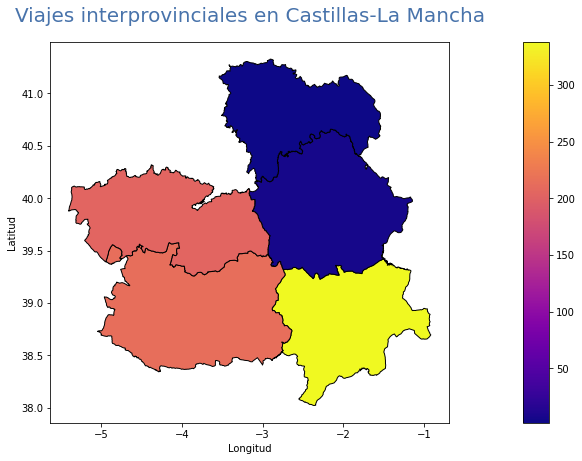

In [ ]:
cml['coords'] = cml['geometry'].apply(lambda x: x.representative_point().coords[:])

cml['coords'] = [coords[0] for coords in cml['coords']]
fig, ax = plt.subplots(figsize = (10,10))

# Control del título y los ejes
ax.set_title('Viajes interprovinciales en Castillas-La Mancha', 
             pad = 20, 
              fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

cml.plot(column='TOTAL_VIAJES', cmap='plasma', ax=ax, legend=True, cax=cax, edgecolor='black')

fig.show()

## Viajes en Andalucía

In [ ]:
andalucia = map_data[map_data["NAME_1"] == 'Andalucía']
andalucia

,id,NAME_1,NAME_2,geometry
0,0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35..."
1,1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36..."
2,2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37..."
3,3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36..."
4,4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37..."
5,5,Andalucía,Jaén,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37..."
6,6,Andalucía,Málaga,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36..."
7,7,Andalucía,Sevilla,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36..."


In [ ]:
interprovincias_andalucia = df_AnaluciaLocalizado[df_AnaluciaLocalizado['INTERPROVINCIAL']== 'Si']
interprovincias_andalucia.head(3)

,Unnamed: 0,DIA,PAIS,ORIGEN,DESTINO,ASIENTOS_OFERTADOS,ASIENTOS_CONFIRMADOS,VIAJES_OFERTADOS,VIAJES_CONFIRMADOS,OFERTANTES,OFERTANTES_NUEVOS,CA_ORIGEN,CA_DESTINO,PROVINCIA_ORIGEN,PROVINCIA_DESTINO,INTERPROVINCIAL
2,476528,2019-08-28,es,Cádiz,Algeciras,19.0,3,8,2,8,1,Andalucía,Andalucía,Cádiz,Cádiz,Si
7,999076,2019-08-28,es,Cádiz,Ubrique,4.0,2,1,1,1,0,Andalucía,Andalucía,Cádiz,Cádiz,Si
10,475898,2017-01-11,es,Cádiz,Algeciras,15.0,3,5,2,4,0,Andalucía,Andalucía,Cádiz,Cádiz,Si


In [ ]:
provincias = andalucia['NAME_2'].to_numpy().tolist()
suma = []
for i in provincias:
  prov = interprovincias_andalucia[interprovincias_andalucia['PROVINCIA_ORIGEN'] == i]
  sumatorio = prov['VIAJES_CONFIRMADOS'].sum()
  suma.append(sumatorio)
  
andalucia['TOTAL_VIAJES'] = suma
andalucia

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,id,NAME_1,NAME_2,geometry,TOTAL_VIAJES
0,0,Andalucía,Almería,"MULTIPOLYGON (((-3.03042 35.94236, -3.03042 35...",622
1,1,Andalucía,Cádiz,"MULTIPOLYGON (((-6.21958 36.38110, -6.21958 36...",2246
2,2,Andalucía,Córdoba,"MULTIPOLYGON (((-5.04854 37.63690, -5.04667 37...",684
3,3,Andalucía,Granada,"MULTIPOLYGON (((-3.35014 36.72952, -3.35014 36...",2069
4,4,Andalucía,Huelva,"MULTIPOLYGON (((-6.83648 37.11547, -6.83643 37...",14
5,5,Andalucía,Jaén,"MULTIPOLYGON (((-3.00812 37.60799, -3.02137 37...",13
6,6,Andalucía,Málaga,"MULTIPOLYGON (((-4.00083 36.73986, -4.00153 36...",2702
7,7,Andalucía,Sevilla,"MULTIPOLYGON (((-5.94118 36.85199, -5.95270 36...",368


/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


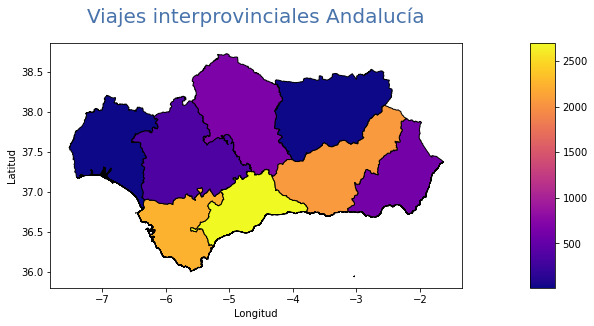

In [ ]:
andalucia['coords'] = andalucia['geometry'].apply(lambda x: x.representative_point().coords[:])

andalucia['coords'] = [coords[0] for coords in andalucia['coords']]
fig, ax = plt.subplots(figsize = (10,10))

# Control del título y los ejes
ax.set_title('Viajes interprovinciales Andalucía', 
             pad = 20, 
              fontdict={'fontsize':20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.2)

andalucia.plot(column='TOTAL_VIAJES', cmap='plasma', ax=ax, legend=True, cax=cax, edgecolor='black')

fig.show()